# Longitudinal analysis of asymmetry index
Črt Rozman <br>
October 2024 <br>
In this file I will do longitudinal analysis of asymmetry index (AI). I want to look at trajectories of AI during different timepoints, for NC, MCI, demented and transition patients(those whose cognition status declined over time). I want to look at AI for whole brain region and also individual regions, such as frontal lobe, temporal lobe and hippocampus. 

In [1]:
# Import necessary libraries
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
# importing functions from "AI_longitudinal_functions.py"
from AI_longitudinal_functions import *

In [3]:
dataPath = '../../NACC_data/AI_longitudinal/'
savePath = '../results/AI_longitudinal/'

In [4]:
# paths to preprocessed and sorted cohorts 
ncPath = '../../NACC_data/sorted_preprocessed_cohorts/NC/'
mciPath = '../../NACC_data/sorted_preprocessed_cohorts/MCI/'
alzdPath = '../../NACC_data/sorted_preprocessed_cohorts/ALZD/'
transPath = '../../NACC_data/sorted_preprocessed_cohorts/TRANS/'

In [5]:
ncPath = os.path.abspath(ncPath)
mciPath = os.path.abspath(mciPath)
alzdPath = os.path.abspath(alzdPath)
transPath = os.path.abspath(transPath)

# Modify the absolute path for long path support on Windows
if os.name == 'nt':                     # Check if the operating system is Windows
    ncPath = '\\\\?\\' + ncPath
    mciPath = '\\\\?\\' + mciPath
    alzdPath = '\\\\?\\' + alzdPath
    transPath = '\\\\?\\' + transPath

In [6]:
# paths to .csv files that store information about patients' scans. 
csv_ncPath = "../../NACC_data/sorted_preprocessed_cohorts/0csv/nc.csv"
csv_mciPath = "../../NACC_data/sorted_preprocessed_cohorts/0csv/mci.csv"
csv_alzdPath = "../../NACC_data/sorted_preprocessed_cohorts/0csv/alzd.csv"
csv_transPath = "../../NACC_data/sorted_preprocessed_cohorts/0csv/trans.csv"

In [7]:
# mask path
maskPath = 'C:/Users/Crt/Documents/WIMR/asymmetryAD/UW_data/AAL3+pons/'

Loading the dictionary that stored NACCID as keys and all the .nii files that correspond to that NACCID, separately for FSPGR and MPRAGE.

In [8]:
nc_wbet_fspgr = filepaths_dictionary(ncPath, csv_ncPath)[0]
nc_wbet_mprage = filepaths_dictionary(ncPath, csv_ncPath)[1]

mci_wbet_fspgr = filepaths_dictionary(mciPath, csv_mciPath)[0]
mci_wbet_mprage = filepaths_dictionary(mciPath, csv_mciPath)[1]

alzd_wbet_fspgr = filepaths_dictionary(alzdPath, csv_alzdPath)[0]
alzd_wbet_mprage = filepaths_dictionary(alzdPath, csv_alzdPath)[1]

trans_wbet_fspgr = filepaths_dictionary(transPath, csv_transPath)[0]
trans_wbet_mprage = filepaths_dictionary(transPath, csv_transPath)[1]

Flattening and normalizing the data.

In [9]:
# nc_fspgr_data = flatten_and_normalize_across_all(nc_wbet_fspgr)
# nc_mprage_data = flatten_and_normalize_across_all(nc_wbet_mprage)

# mci_fspgr_data = flatten_and_normalize_across_all(mci_wbet_fspgr)
# mci_mprage_data = flatten_and_normalize_across_all(mci_wbet_mprage)

# alzd_fspgr_data = flatten_and_normalize_across_all(alzd_wbet_fspgr)
# alzd_mprage_data = flatten_and_normalize_across_all(alzd_wbet_mprage)

# trans_fspgr_data = flatten_and_normalize_across_all(trans_wbet_fspgr)
# trans_mprage_data = flatten_and_normalize_across_all(trans_wbet_mprage)

Saving this data, since it takes a lot of time to run the code.

In [10]:
# np.savez_compressed(dataPath+'nc_fspgr_data.npz', **nc_fspgr_data)
# np.savez_compressed(dataPath+'nc_mprage_data.npz', **nc_mprage_data)
# np.savez_compressed(dataPath+'mci_fspgr_data.npz', **mci_fspgr_data)
# np.savez_compressed(dataPath+'mci_mprage_data.npz', **mci_mprage_data)
# np.savez_compressed(dataPath+'alzd_fspgr_data.npz', **alzd_fspgr_data)
# np.savez_compressed(dataPath+'alzd_mprage_data.npz', **alzd_mprage_data)
# np.savez_compressed(dataPath+'trans_fspgr_data.npz', **trans_fspgr_data)
# np.savez_compressed(dataPath+'trans_mprage_data.npz', **trans_mprage_data)

Loading the saved results.

In [11]:
def load_npz_file(filename):
    with np.load(filename) as data:
        return {key: data[key] for key in data}

In [12]:
nc_fspgr_data = load_npz_file(dataPath+'nc_fspgr_data.npz')
nc_mprage_data = load_npz_file(dataPath+'nc_mprage_data.npz')

mci_fspgr_data = load_npz_file(dataPath+'mci_fspgr_data.npz')
mci_mprage_data = load_npz_file(dataPath+'mci_mprage_data.npz')

alzd_fspgr_data = load_npz_file(dataPath+'alzd_fspgr_data.npz')
alzd_mprage_data = load_npz_file(dataPath+'alzd_mprage_data.npz')

trans_fspgr_data = load_npz_file(dataPath+'trans_fspgr_data.npz')
trans_mprage_data = load_npz_file(dataPath+'trans_mprage_data.npz')

Getting mask by hemispheres.

In [16]:
left_hemisphere_mask = mask_hemispheres(maskPath + 'AAL3+pons.nii', maskPath + 'AAL3+pons.txt', flatten=True)[0]
right_hemisphere_mask = mask_hemispheres(maskPath + 'AAL3+pons.nii', maskPath + 'AAL3+pons.txt', flatten=True)[1]

Getting mask by regions.

In [17]:
mask_L_frontal_lobe = mask_regions(maskPath, flatten=True)[0]
mask_R_frontal_lobe = mask_regions(maskPath, flatten=True)[1]
mask_L_temporal_lobe = mask_regions(maskPath, flatten=True)[2]
mask_R_temporal_lobe = mask_regions(maskPath, flatten=True)[3]
mask_L_hippocampus = mask_regions(maskPath, flatten=True)[4]
mask_R_hippocampus = mask_regions(maskPath, flatten=True)[5]

### Calculating the time of scan since baseline (first scan)

In [32]:
nc_scan_times = time_from_baseline(csv_ncPath)
mci_scan_times = time_from_baseline(csv_mciPath)
alzd_scan_times = time_from_baseline(csv_alzdPath)
trans_scan_times = time_from_baseline(csv_transPath)

### Calculating the AI of whole brain and regions
In this section I use function calculate_AI and save the results, then load them again later. That way there is no need to calculate everything everytime you run the script. (commented since it only needs to run once)

In [ ]:
# AI_nc_fspgr_whole = calculate_AI(nc_fspgr_data, left_hemisphere_mask, right_hemisphere_mask)
# AI_nc_mprage_whole = calculate_AI(nc_mprage_data, left_hemisphere_mask, right_hemisphere_mask)

# AI_mci_fspgr_whole = calculate_AI(mci_fspgr_data, left_hemisphere_mask, right_hemisphere_mask)
# AI_mci_mprage_whole = calculate_AI(mci_mprage_data, left_hemisphere_mask, right_hemisphere_mask)

# AI_alzd_fspgr_whole = calculate_AI(alzd_fspgr_data, left_hemisphere_mask, right_hemisphere_mask)
# AI_alzd_mprage_whole = calculate_AI(alzd_mprage_data, left_hemisphere_mask, right_hemisphere_mask)

# AI_trans_fspgr_whole = calculate_AI(trans_fspgr_data, left_hemisphere_mask, right_hemisphere_mask)
# AI_trans_mprage_whole = calculate_AI(trans_mprage_data, left_hemisphere_mask, right_hemisphere_mask)

In [ ]:
# np.savez_compressed(dataPath+'AI_nc_fspgr_whole.npz', **AI_nc_fspgr_whole)
# np.savez_compressed(dataPath+'AI_nc_mprage_whole.npz', **AI_nc_mprage_whole)
# np.savez_compressed(dataPath+'AI_mci_fspgr_whole.npz', **AI_mci_fspgr_whole)
# np.savez_compressed(dataPath+'AI_mci_mprage_whole.npz', **AI_mci_mprage_whole)
# np.savez_compressed(dataPath+'AI_alzd_fspgr_whole.npz', **AI_alzd_fspgr_whole)
# np.savez_compressed(dataPath+'AI_alzd_mprage_whole.npz', **AI_alzd_mprage_whole)
# np.savez_compressed(dataPath+'AI_trans_fspgr_whole.npz', **AI_trans_fspgr_whole)
# np.savez_compressed(dataPath+'AI_trans_mprage_whole.npz', **AI_trans_mprage_whole)

Calculating AI by regions. 

In [ ]:
# AI_nc_fspgr_frontal_lobe = calculate_AI(nc_fspgr_data, mask_L_frontal_lobe, mask_R_frontal_lobe)
# AI_nc_mprage_frontal_lobe = calculate_AI(nc_mprage_data, mask_L_frontal_lobe, mask_R_frontal_lobe)

# AI_mci_fspgr_frontal_lobe = calculate_AI(mci_fspgr_data, mask_L_frontal_lobe, mask_R_frontal_lobe)
# AI_mci_mprage_frontal_lobe = calculate_AI(mci_mprage_data, mask_L_frontal_lobe, mask_R_frontal_lobe)

# AI_alzd_fspgr_frontal_lobe = calculate_AI(alzd_fspgr_data, mask_L_frontal_lobe, mask_R_frontal_lobe)
# AI_alzd_mprage_frontal_lobe = calculate_AI(alzd_mprage_data, mask_L_frontal_lobe, mask_R_frontal_lobe)

# AI_trans_fspgr_frontal_lobe = calculate_AI(trans_fspgr_data, mask_L_frontal_lobe, mask_R_frontal_lobe)
# AI_trans_mprage_frontal_lobe = calculate_AI(trans_mprage_data, mask_L_frontal_lobe, mask_R_frontal_lobe)

In [ ]:
# np.savez_compressed(dataPath+'AI_nc_fspgr_frontal_lobe.npz', **AI_nc_fspgr_frontal_lobe)
# np.savez_compressed(dataPath+'AI_nc_mprage_frontal_lobe.npz', **AI_nc_mprage_frontal_lobe)
# np.savez_compressed(dataPath+'AI_mci_fspgr_frontal_lobe.npz', **AI_mci_fspgr_frontal_lobe)
# np.savez_compressed(dataPath+'AI_mci_mprage_frontal_lobe.npz', **AI_mci_mprage_frontal_lobe)
# np.savez_compressed(dataPath+'AI_alzd_fspgr_frontal_lobe.npz', **AI_alzd_fspgr_frontal_lobe)
# np.savez_compressed(dataPath+'AI_alzd_mprage_frontal_lobe.npz', **AI_alzd_mprage_frontal_lobe)
# np.savez_compressed(dataPath+'AI_trans_fspgr_frontal_lobe.npz', **AI_trans_fspgr_frontal_lobe)
# np.savez_compressed(dataPath+'AI_trans_mprage_frontal_lobe.npz', **AI_trans_mprage_frontal_lobe)

In [ ]:
# AI_nc_fspgr_temporal_lobe = calculate_AI(nc_fspgr_data, mask_L_temporal_lobe, mask_R_temporal_lobe)
# AI_nc_mprage_temporal_lobe = calculate_AI(nc_mprage_data, mask_L_temporal_lobe, mask_R_temporal_lobe)

# AI_mci_fspgr_temporal_lobe = calculate_AI(mci_fspgr_data, mask_L_temporal_lobe, mask_R_temporal_lobe)
# AI_mci_mprage_temporal_lobe = calculate_AI(mci_mprage_data, mask_L_temporal_lobe, mask_R_temporal_lobe)

# AI_alzd_fspgr_temporal_lobe = calculate_AI(alzd_fspgr_data, mask_L_temporal_lobe, mask_R_temporal_lobe)
# AI_alzd_mprage_temporal_lobe = calculate_AI(alzd_mprage_data, mask_L_temporal_lobe, mask_R_temporal_lobe)

# AI_trans_fspgr_temporal_lobe = calculate_AI(trans_fspgr_data, mask_L_temporal_lobe, mask_R_temporal_lobe)
# AI_trans_mprage_temporal_lobe = calculate_AI(trans_mprage_data, mask_L_temporal_lobe, mask_R_temporal_lobe)

In [ ]:
# np.savez_compressed(dataPath+'AI_nc_fspgr_temporal_lobe.npz', **AI_nc_fspgr_temporal_lobe)
# np.savez_compressed(dataPath+'AI_nc_mprage_temporal_lobe.npz', **AI_nc_mprage_temporal_lobe)
# np.savez_compressed(dataPath+'AI_mci_fspgr_temporal_lobe.npz', **AI_mci_fspgr_temporal_lobe)
# np.savez_compressed(dataPath+'AI_mci_mprage_temporal_lobe.npz', **AI_mci_mprage_temporal_lobe)
# np.savez_compressed(dataPath+'AI_alzd_fspgr_temporal_lobe.npz', **AI_alzd_fspgr_temporal_lobe)
# np.savez_compressed(dataPath+'AI_alzd_mprage_temporal_lobe.npz', **AI_alzd_mprage_temporal_lobe)
# np.savez_compressed(dataPath+'AI_trans_fspgr_temporal_lobe.npz', **AI_trans_fspgr_temporal_lobe)
# np.savez_compressed(dataPath+'AI_trans_mprage_temporal_lobe.npz', **AI_trans_mprage_temporal_lobe)

In [ ]:
# AI_nc_fspgr_hippocampus = calculate_AI(nc_fspgr_data, mask_L_hippocampus, mask_R_hippocampus)
# AI_nc_mprage_hippocampus = calculate_AI(nc_mprage_data, mask_L_hippocampus, mask_R_hippocampus)

# AI_mci_fspgr_hippocampus = calculate_AI(mci_fspgr_data, mask_L_hippocampus, mask_R_hippocampus)
# AI_mci_mprage_hippocampus = calculate_AI(mci_mprage_data, mask_L_hippocampus, mask_R_hippocampus)

# AI_alzd_fspgr_hippocampus = calculate_AI(alzd_fspgr_data, mask_L_hippocampus, mask_R_hippocampus)
# AI_alzd_mprage_hippocampus = calculate_AI(alzd_mprage_data, mask_L_hippocampus, mask_R_hippocampus)

# AI_trans_fspgr_hippocampus = calculate_AI(trans_fspgr_data, mask_L_hippocampus, mask_R_hippocampus)
# AI_trans_mprage_hippocampus = calculate_AI(trans_mprage_data, mask_L_hippocampus, mask_R_hippocampus)

In [ ]:
# np.savez_compressed(dataPath+'AI_nc_fspgr_hippocampus.npz', **AI_nc_fspgr_hippocampus)
# np.savez_compressed(dataPath+'AI_nc_mprage_hippocampus.npz', **AI_nc_mprage_hippocampus)
# np.savez_compressed(dataPath+'AI_mci_fspgr_hippocampus.npz', **AI_mci_fspgr_hippocampus)
# np.savez_compressed(dataPath+'AI_mci_mprage_hippocampus.npz', **AI_mci_mprage_hippocampus)
# np.savez_compressed(dataPath+'AI_alzd_fspgr_hippocampus.npz', **AI_alzd_fspgr_hippocampus)
# np.savez_compressed(dataPath+'AI_alzd_mprage_hippocampus.npz', **AI_alzd_mprage_hippocampus)
# np.savez_compressed(dataPath+'AI_trans_fspgr_hippocampus.npz', **AI_trans_fspgr_hippocampus)
# np.savez_compressed(dataPath+'AI_trans_mprage_hippocampus.npz', **AI_trans_mprage_hippocampus)

Loading the AI results.

In [27]:
AI_nc_fspgr_whole = load_npz_file(dataPath+'AI_nc_fspgr_whole.npz')
AI_nc_mprage_whole = load_npz_file(dataPath+'AI_nc_mprage_whole.npz')
AI_mci_fspgr_whole = load_npz_file(dataPath+'AI_mci_fspgr_whole.npz')
AI_mci_mprage_whole = load_npz_file(dataPath+'AI_mci_mprage_whole.npz')
AI_alzd_fspgr_whole = load_npz_file(dataPath+'AI_alzd_fspgr_whole.npz')
AI_alzd_mprage_whole = load_npz_file(dataPath+'AI_alzd_mprage_whole.npz')
AI_trans_fspgr_whole = load_npz_file(dataPath+'AI_trans_fspgr_whole.npz')
AI_trans_mprage_whole = load_npz_file(dataPath+'AI_trans_mprage_whole.npz')

In [28]:
AI_nc_fspgr_frontal_lobe = load_npz_file(dataPath+'AI_nc_fspgr_frontal_lobe.npz')
AI_nc_mprage_frontal_lobe = load_npz_file(dataPath+'AI_nc_mprage_frontal_lobe.npz')
AI_mci_fspgr_frontal_lobe = load_npz_file(dataPath+'AI_mci_fspgr_frontal_lobe.npz')
AI_mci_mprage_frontal_lobe = load_npz_file(dataPath+'AI_mci_mprage_frontal_lobe.npz')
AI_alzd_fspgr_frontal_lobe = load_npz_file(dataPath+'AI_alzd_fspgr_frontal_lobe.npz')
AI_alzd_mprage_frontal_lobe = load_npz_file(dataPath+'AI_alzd_mprage_frontal_lobe.npz')
AI_trans_fspgr_frontal_lobe = load_npz_file(dataPath+'AI_trans_fspgr_frontal_lobe.npz')
AI_trans_mprage_frontal_lobe = load_npz_file(dataPath+'AI_trans_mprage_frontal_lobe.npz')

In [29]:
AI_nc_fspgr_temporal_lobe = load_npz_file(dataPath+'AI_nc_fspgr_temporal_lobe.npz')
AI_nc_mprage_temporal_lobe = load_npz_file(dataPath+'AI_nc_mprage_temporal_lobe.npz')
AI_mci_fspgr_temporal_lobe = load_npz_file(dataPath+'AI_mci_fspgr_temporal_lobe.npz')
AI_mci_mprage_temporal_lobe = load_npz_file(dataPath+'AI_mci_mprage_temporal_lobe.npz')
AI_alzd_fspgr_temporal_lobe = load_npz_file(dataPath+'AI_alzd_fspgr_temporal_lobe.npz')
AI_alzd_mprage_temporal_lobe = load_npz_file(dataPath+'AI_alzd_mprage_temporal_lobe.npz')
AI_trans_fspgr_temporal_lobe = load_npz_file(dataPath+'AI_trans_fspgr_temporal_lobe.npz')
AI_trans_mprage_temporal_lobe = load_npz_file(dataPath+'AI_trans_mprage_temporal_lobe.npz')

In [31]:
AI_nc_fspgr_hippocampus = load_npz_file(dataPath+'AI_nc_fspgr_hippocampus.npz')
AI_nc_mprage_hippocampus = load_npz_file(dataPath+'AI_nc_mprage_hippocampus.npz')
AI_mci_fspgr_hippocampus = load_npz_file(dataPath+'AI_mci_fspgr_hippocampus.npz')
AI_mci_mprage_hippocampus = load_npz_file(dataPath+'AI_mci_mprage_hippocampus.npz')
AI_alzd_fspgr_hippocampus = load_npz_file(dataPath+'AI_alzd_fspgr_hippocampus.npz')
AI_alzd_mprage_hippocampus = load_npz_file(dataPath+'AI_alzd_mprage_hippocampus.npz')
AI_trans_fspgr_hippocampus = load_npz_file(dataPath+'AI_trans_fspgr_hippocampus.npz')
AI_trans_mprage_hippocampus = load_npz_file(dataPath+'AI_trans_mprage_hippocampus.npz')

### Matching calculted AI with scan times and plotting longitudinal results. 

In [ ]:
AI_fspgr = [AI_alzd_fspgr_whole, AI_alzd_fspgr_frontal_lobe, AI_alzd_fspgr_temporal_lobe, AI_alzd_fspgr_hippocampus]
AI_mprage = [AI_alzd_mprage_whole, AI_alzd_mprage_frontal_lobe, AI_alzd_mprage_temporal_lobe, AI_alzd_mprage_hippocampus]

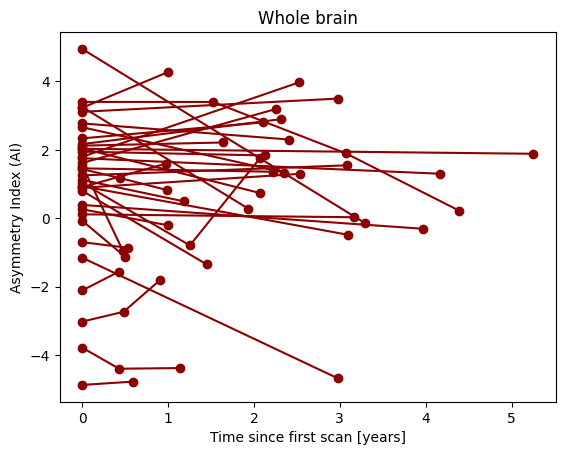

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle('ALZD Patients', fontsize=16)

# Titles for the subplots
titles = [
    "Whole brain, FSPGR", "Whole brain, MPRAGE",
    "Frontal lobe, FSPGR", "Frontal lobe, MPRAGE",
    "Temporal lobe, FSPGR", "Temporal lobe, MPRAGE",
    "Hippocampus, FSPGR", "Hippocampus, MPRAGE"
]

# Iterate over the rows (regions) and plot for FSPGR (left) and MPRAGE (right)
for i in range(4):
    # FSPGR plot on the left column
    for naccid, ai_values in AI_fspgr[i].items():
        if naccid in alzd_scan_times:
            scan_times = alzd_scan_times[naccid]
            axes[i, 0].plot(scan_times, ai_values, color='darkred', marker='o')
    axes[i, 0].set_title(titles[2 * i])   # Title for the subplot
    axes[i, 0].set_xlabel('Time since first scan [years]')
    axes[i, 0].set_ylabel('Asymmetry Index (AI)')

    # MPRAGE plot on the right column
    for naccid, ai_values in AI_mprage[i].items():
        if naccid in alzd_scan_times:
            scan_times = alzd_scan_times[naccid]
            axes[i, 1].plot(scan_times, ai_values, color='purple', marker='o')
    axes[i, 1].set_title(titles[2 * i + 1])   # Title for the subplot
    axes[i, 1].set_xlabel('Time since first scan [years]')
    axes[i, 1].set_ylabel('Asymmetry Index (AI)')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()